In [1]:
import torch
import hpc_evaluation
print(dir(hpc_evaluation))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'run_hpc_evaluation']


In [5]:
def run_hpc(N, F, rep, is_print):
    return hpc_evaluation.run_hpc_evaluation(N, F, rep, is_print)

hpc_evaluation.run_hpc_evaluation(1024, 256, 100, 0)
hpc_evaluation.run_hpc_evaluation(1024, 256, 100, 1)

CPU_Pytorch: 21 (ms)

(0, 11, 21, True)


GPU_Pytorch: 11 (ms)
GPU_Ours: 0 (ms)
feats_interp equal.


In [74]:
run_hpc(10000, 1000, 100, 0)[:3]

(76, 1424, 46454)

# EXP1

In [75]:
repeat_times = 500

# exp1: var F
N = 1024
F_list = torch.arange(16, 256+1, step=16, dtype=torch.int32)

exp1_record = []
for F_ in F_list:
    exp1_record.append(run_hpc(N, F_, repeat_times, 0)[:3])

exp1_record = torch.as_tensor(exp1_record).float()

In [19]:
print(
    exp1_record.mean(dim=0), 
    exp1_record.shape
)

tensor([ 1.0000, 57.8125, 87.8125]) torch.Size([16, 3])


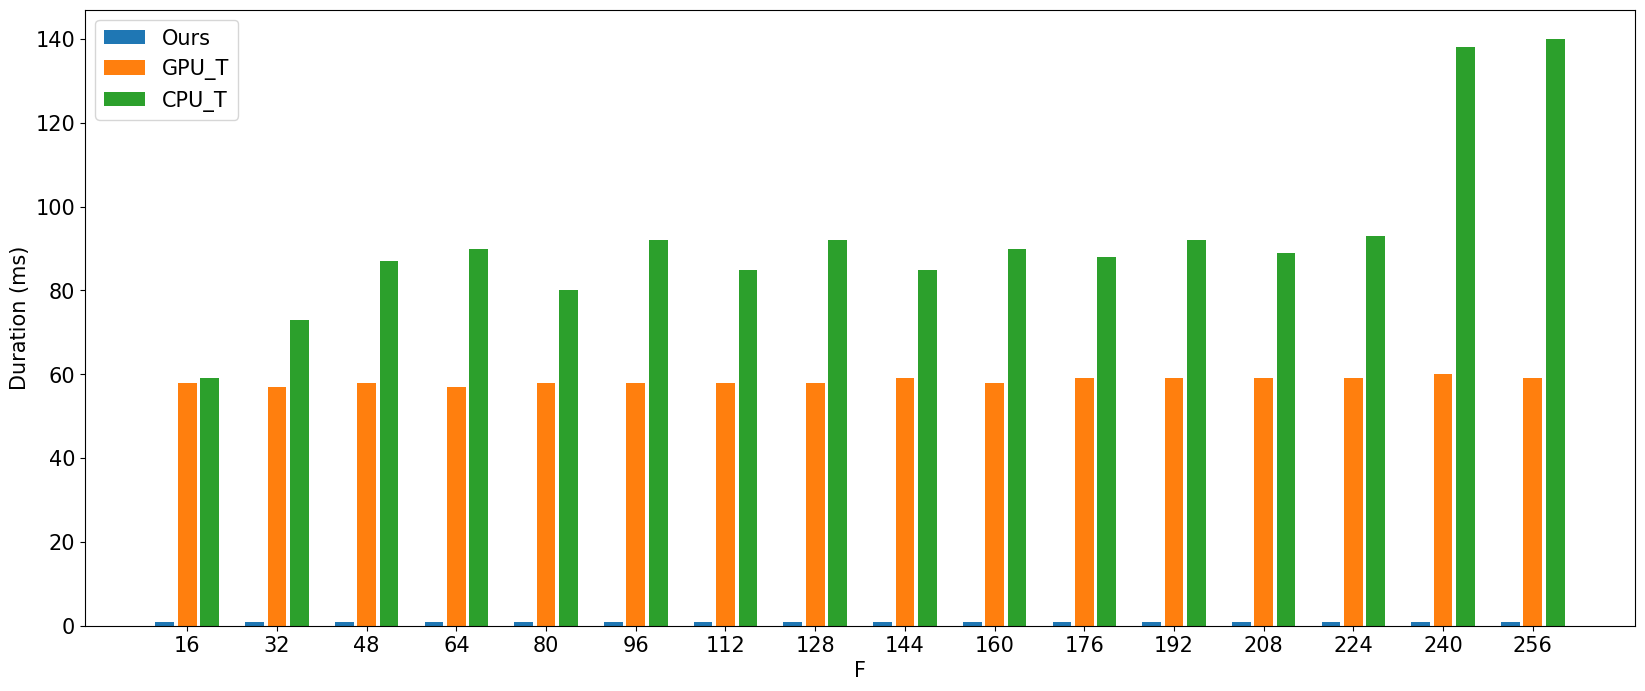

In [90]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

# 假设 exp1_record 是一个形状为 (N, 3) 的NumPy数组，包含你的数据
N = exp1_record.shape[0]

# 设置每组数据的标签
labels = ['{}'.format(i) for i in F_list]

# 绘制柱状图
width = 10  # 柱子的宽度
x = F_list * 3 # x轴上的位置

fig = plt.figure(figsize=(20, 8))
ax = fig.gca()  # 即获得当前figure的axes

delta_list = [- width * 1.2, 0, width * 1.2 ]
data_list = ["Ours", "GPU_T", "CPU_T"]
for i in range(3):
    ax.bar(x + delta_list[i], exp1_record[:, i], width, label=data_list[i].format(i + 1))

ax.set_xlabel('F')
ax.set_ylabel('Duration (ms)')
# ax.set_title('Duration of varies F under constant N=1024')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("./ex1.pdf", bbox_inches="tight")
plt.show()

# EXP2

In [97]:
# exp2: var F
N_list = torch.arange(256, 1024*4+1, 256)
F = 256

exp2_record = []
for N_ in N_list:
    exp2_record.append(run_hpc(N_, F, repeat_times, 0)[:3])

exp2_record = torch.as_tensor(exp2_record).float()

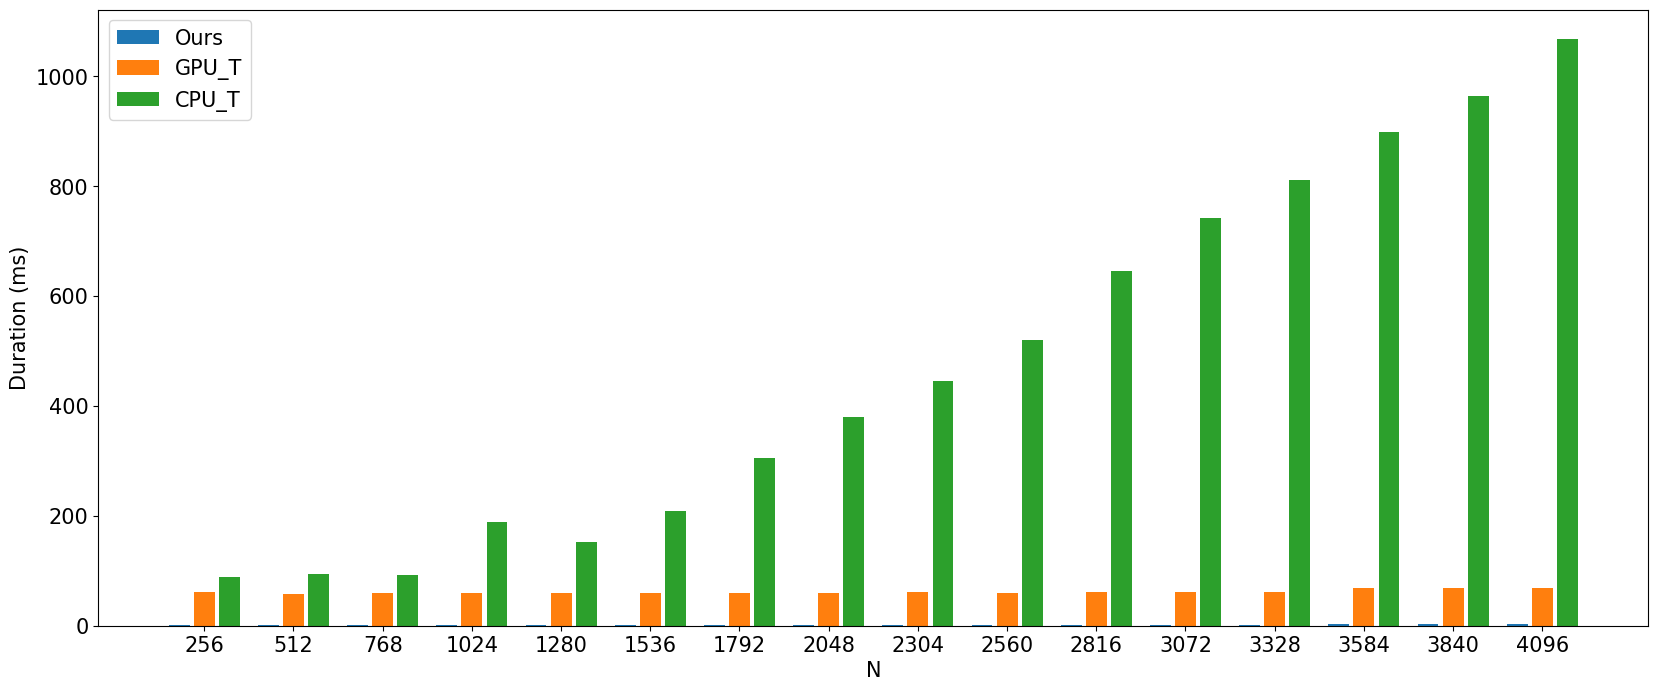

In [93]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

N = exp2_record.shape[0]

# 设置每组数据的标签
labels = ['{}'.format(i) for i in N_list]

# 绘制柱状图
width = 60  # 柱子的宽度
x = N_list # x轴上的位置

fig = plt.figure(figsize=(20, 8))
ax = fig.gca()  # 即获得当前figure的axes

delta_list = [- width * 1.2, 0, width * 1.2 ]
data_list = ["Ours", "GPU_T", "CPU_T"]
for i in range(3):
    ax.bar(x + delta_list[i], exp2_record[:, i], width, label=data_list[i].format(i + 1))

ax.set_xlabel('N')
ax.set_ylabel('Duration (ms)')
# ax.set_title('Duration of varies N under constant F={}'.format(F))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("./ex2.pdf", bbox_inches="tight")
plt.show()

# EXP3-加速比结果

In [89]:
# 实验一加速比

exp1_acc_gpu_t = torch.mean(exp1_record[:, 1] / exp1_record[:, 0])
exp1_acc_cpu_t = (exp1_record[:, 2] / exp1_record[:, 0]).mean()
print(exp1_acc_gpu_t, exp1_acc_cpu_t)

tensor(58.3750) tensor(92.0625)


In [98]:
# 实验2加速比

exp2_acc_gpu_t = torch.mean(exp2_record[:, 1] / exp2_record[:, 0])
exp2_acc_cpu_t = (exp2_record[:, 2] / exp2_record[:, 0]).mean()
print(exp2_acc_gpu_t, exp2_acc_cpu_t)

tensor(52.5000) tensor(316.8958)


In [88]:
# CPU acc
exp1_acc_gpu_t = exp1_record[:, 1] / exp1_record[:, 0]
exp2_acc_gpu_t = exp2_record[:, 1] / exp2_record[:, 0]

print("GPU 加速比:", torch.vstack([exp1_acc_gpu_t, exp2_acc_gpu_t]).mean())

# CPU acc
exp1_acc_cpu_t = exp1_record[:, 2] / exp1_record[:, 0]
exp2_acc_cpu_t = exp2_record[:, 2] / exp2_record[:, 0]
print("CPU 加速比:", torch.vstack([exp1_acc_cpu_t, exp2_acc_cpu_t]).mean())

GPU 加速比: tensor(55.7604)
CPU 加速比: tensor(222.6562)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

# 假设 exp1_record 是一个形状为 (N, 3) 的NumPy数组，包含你的数据
N = exp1_record.shape[0]

# 设置每组数据的标签
labels = ['{}'.format(i) for i in F_list]

# 绘制柱状图
width = 10  # 柱子的宽度
x = F_list * 3 # x轴上的位置

fig = plt.figure(figsize=(20, 8))
ax = fig.gca()  # 即获得当前figure的axes

delta_list = [- width * 1.2, 0, width * 1.2 ]
data_list = ["Ours", "GPU_T", "CPU_T"]
for i in range(3):
    ax.bar(x + delta_list[i], exp1_record[:, i], width, label=data_list[i].format(i + 1))

ax.set_xlabel('F')
ax.set_ylabel('Duration (ms)')
ax.set_title('Duration of varies F under constant N=1024')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("./ex1.pdf", bbox_inches="tight")
plt.show()